In [197]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import  xgboost as xgb
from sklearn.impute import SimpleImputer

In [198]:

data=pd.read_csv('data.csv')
data.sample(10)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [199]:
count=data[data['Churn']=='No'].shape[0]
print(count)

5174


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   6691 non-null   object 
 9   OnlineSecurity    6691 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [201]:
numeric_col = data.select_dtypes(include=['int64', 'float64']).columns
num_imp = SimpleImputer(strategy='median')
data[numeric_col] = num_imp.fit_transform(data[numeric_col])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [202]:
object_col = data.select_dtypes(include=['object']).columns
cat_imp = SimpleImputer(strategy='most_frequent')
data[object_col] = cat_imp.fit_transform(data[object_col])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [203]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [204]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.0,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.0,72.00
MonthlyCharges,7043.0,65.042297,29.366794,18.25,40.300,70.300,89.3,118.75
TotalCharges,7043.0,2239.232944,2216.793789,18.80,442.725,1396.125,3606.8,8684.80


In [205]:
df1=data.copy()
for col in object_col:
    df1[col] = df1[col].astype('category')

label_encoder = LabelEncoder()
for col in object_col:
        df1[col] = label_encoder.fit_transform(df1[col])

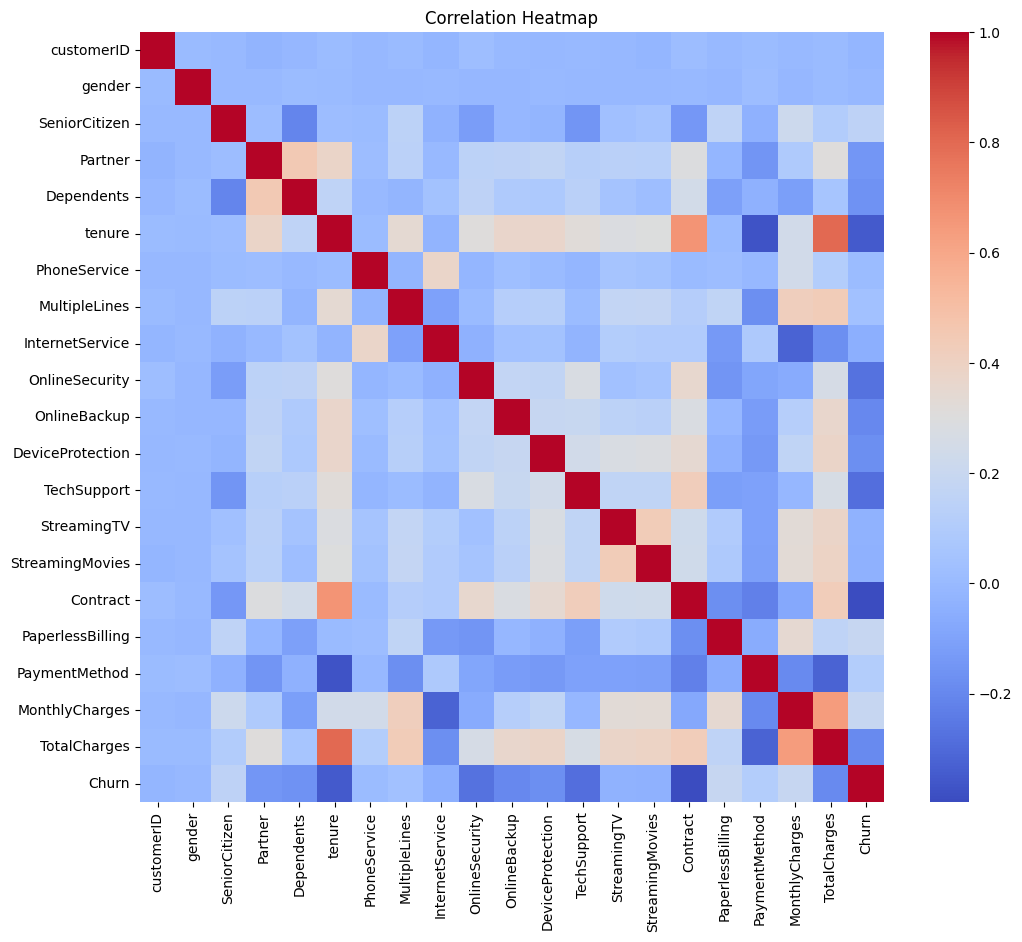

In [206]:
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


 Processing column: SeniorCitizen 
Number of outliers BEFORE removal: 1142
Number of outliers AFTER removal: 0


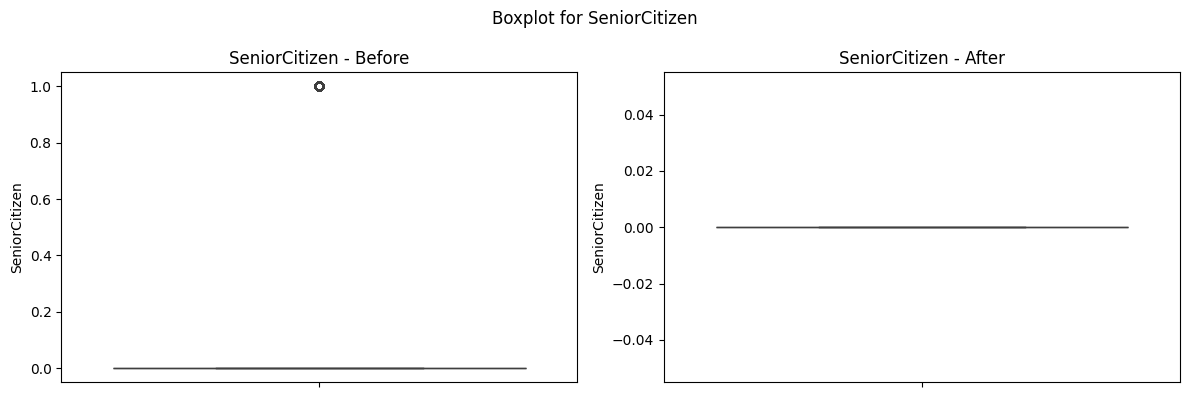


 Processing column: tenure 
Number of outliers BEFORE removal: 0
Number of outliers AFTER removal: 0


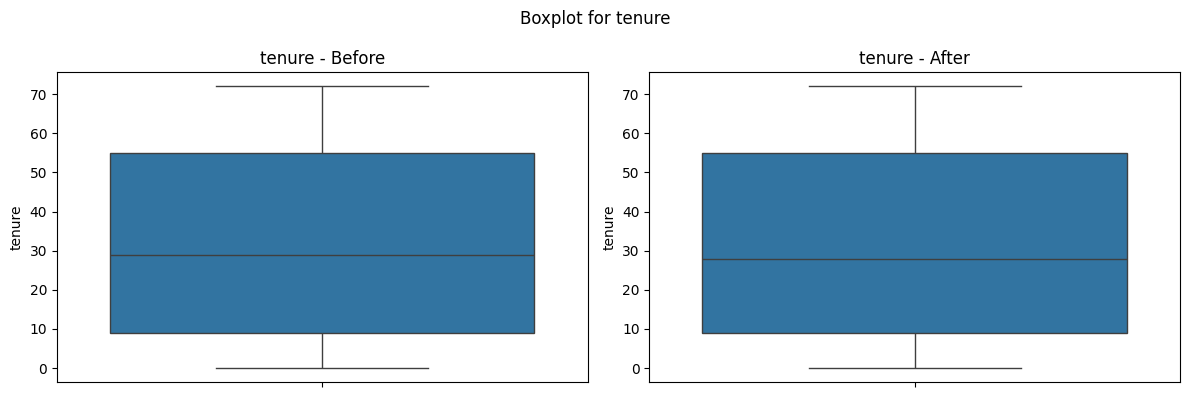


 Processing column: MonthlyCharges 
Number of outliers BEFORE removal: 0
Number of outliers AFTER removal: 0


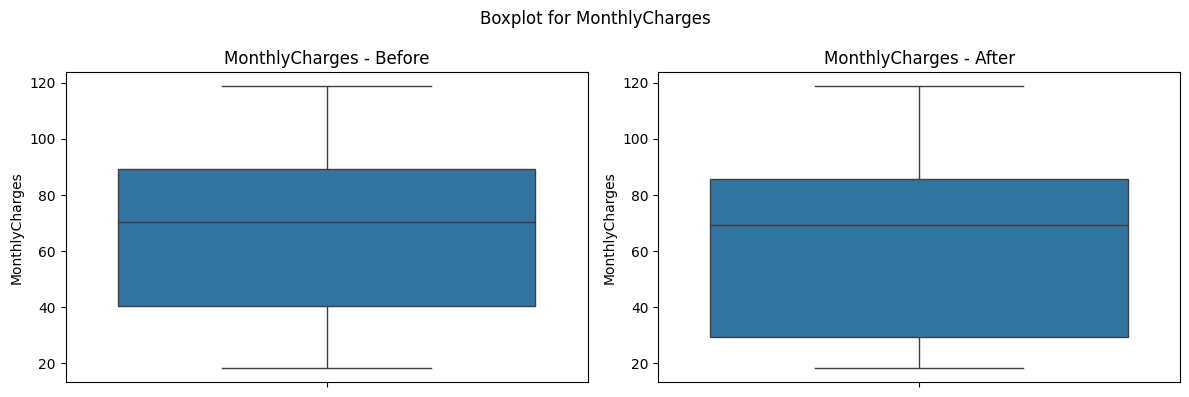


 Processing column: TotalCharges 
Number of outliers BEFORE removal: 23
Number of outliers AFTER removal: 0


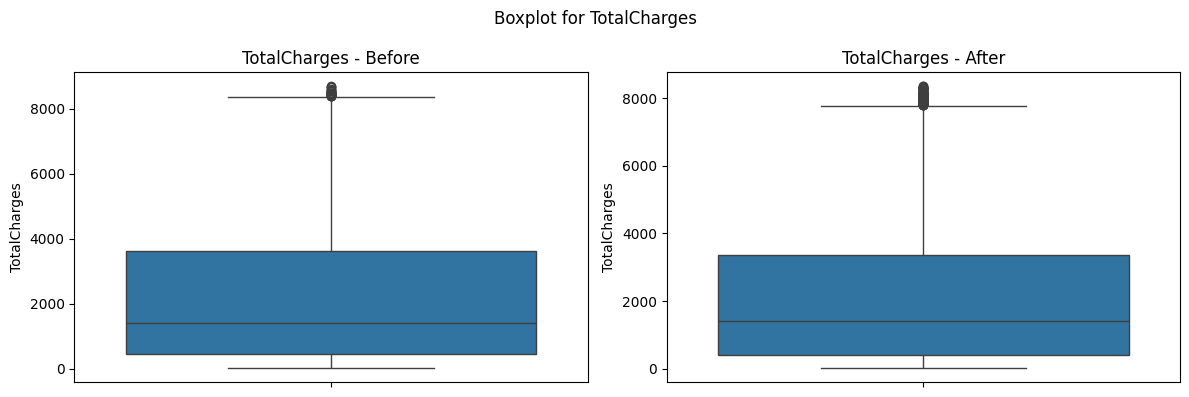

In [207]:
 
df_clean = data.copy()

for col in numeric_col:
    print(f"\n Processing column: {col} ")

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

   
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

  
    outliers_before = data[(data[col] < lower) | (data[col] > upper)]
    print(f"Number of outliers BEFORE removal: {len(outliers_before)}")
    
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
    outliers_after = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    print(f"Number of outliers AFTER removal: {len(outliers_after)}")

   
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(y=data[col], ax=axes[0])
    axes[0].set_title(f"{col} - Before")

    sns.boxplot(y=df_clean[col], ax=axes[1])
    axes[1].set_title(f"{col} - After")

    plt.suptitle(f"Boxplot for {col}")
    plt.tight_layout()
    plt.show()


In [208]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data['num_months_Subscribe']=data['TotalCharges']/data['MonthlyCharges']

In [209]:
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,num_months_Subscribe
4900,7137-RYLPP,Male,1.0,Yes,No,37.0,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,85.70,3171.15,Yes,37.002917
4120,9138-EFSMO,Male,0.0,Yes,Yes,26.0,Yes,No,Fiber optic,No,...,No,No,Yes,One year,No,Bank transfer (automatic),78.95,2034.25,No,25.766308
6244,5331-RGMTT,Male,1.0,Yes,No,54.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.05,5295.70,No,53.464917
6021,3752-CQSJI,Female,0.0,Yes,Yes,13.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,254.50,No,12.444988
2231,2482-CZGBB,Male,0.0,No,No,10.0,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.00,740.00,Yes,10.571429
2571,8216-AZUUZ,Female,0.0,Yes,Yes,42.0,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Two year,Yes,Electronic check,100.40,4303.65,No,42.865040
3822,6137-NICCO,Female,0.0,Yes,Yes,6.0,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Mailed check,94.05,518.75,No,5.515683
2286,1465-LNTLJ,Male,1.0,Yes,No,8.0,Yes,No,DSL,No,...,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),64.40,581.70,No,9.032609
2122,4123-FCVCB,Female,0.0,No,No,12.0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,75.85,854.45,No,11.264997
5113,9258-CNWAC,Female,0.0,Yes,Yes,71.0,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.65,8166.80,No,71.859217


In [210]:
data['MultipleLines']=data['MultipleLines'].replace('No phone service','No')

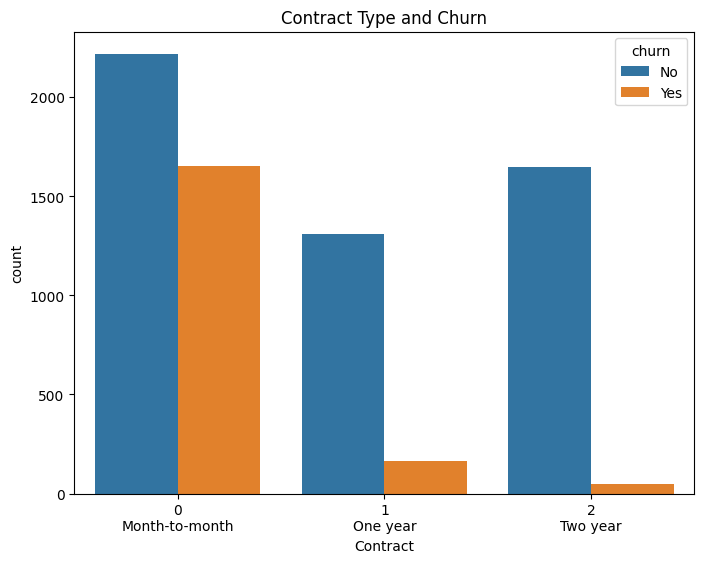

In [211]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Contract", hue="Churn", data=data)
plt.title("Contract Type and Churn")
plt.xticks(ticks=[0, 1, 2], labels=["0\nMonth-to-month", "1\nOne year", "2\nTwo year"])
plt.legend(title="churn")
plt.show()

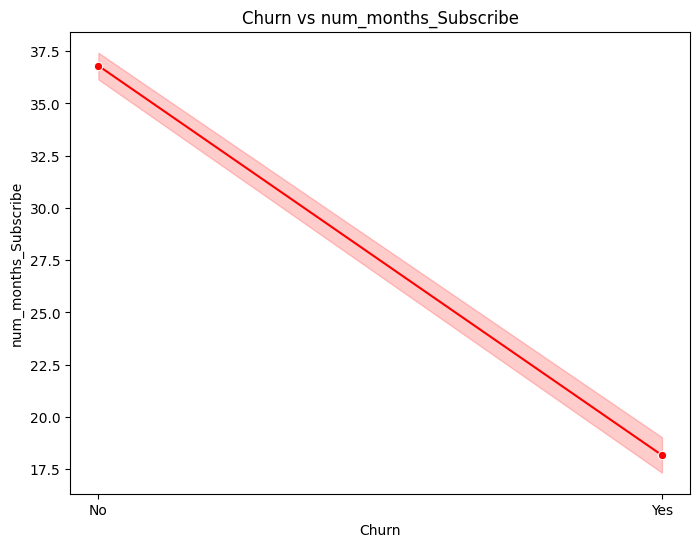

In [212]:
plt.figure(figsize=(8, 6))
sns.lineplot(x="Churn", y="num_months_Subscribe", data=data, marker="o", color="red")
plt.title("Churn vs num_months_Subscribe")
plt.show()

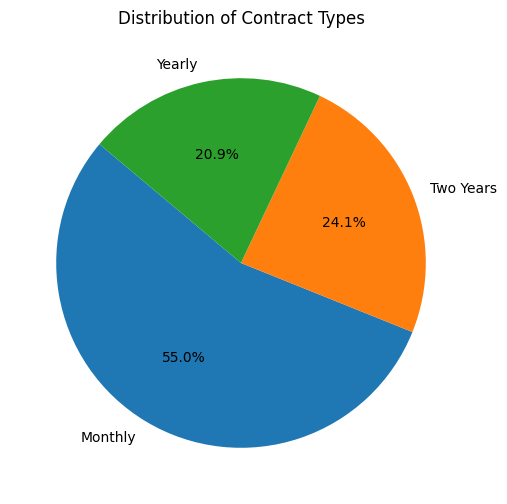

In [213]:
contract_counts = data['Contract'].value_counts()

custom_labels = ['Monthly', 'Two Years', 'Yearly']

plt.figure(figsize=(6, 6))
plt.pie(contract_counts, autopct='%1.1f%%', startangle=140,labels=custom_labels)
plt.title("Distribution of Contract Types")
plt.show()

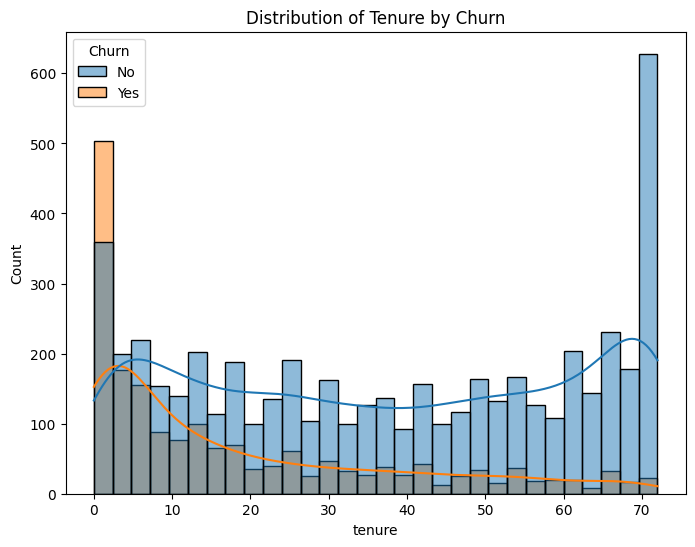

In [214]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="tenure", hue="Churn", kde=True, bins=30)
plt.title("Distribution of Tenure by Churn")
plt.show()

In [215]:
data=data.drop(columns='customerID')

In [216]:
label=LabelEncoder()
data['Contract']=label.fit_transform(data['Contract'])

In [217]:
x=data.select_dtypes(include='object').columns


encoder = OneHotEncoder(sparse_output=False, drop='first')  


encoded = encoder.fit_transform(data[x])


encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(x), index=data.index)


data.drop(columns=x, inplace=True)


data = pd.concat([data, encoded_df], axis=1)

In [218]:
data.sample(10)

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,num_months_Subscribe,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
5559,0.0,13.0,0,31.65,389.950,12.320695,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4801,0.0,72.0,2,80.85,5824.750,72.043908,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5375,0.0,1.0,0,50.80,50.800,1.000000,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4026,0.0,72.0,2,114.30,8058.550,70.503500,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
264,0.0,45.0,1,113.30,5032.250,44.415269,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3376,0.0,1.0,0,70.30,1396.125,19.859531,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
464,1.0,72.0,2,116.05,8404.900,72.424817,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6276,0.0,15.0,1,20.35,335.950,16.508600,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6385,0.0,4.0,0,101.70,364.550,3.584562,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
2278,1.0,7.0,0,48.20,340.350,7.061203,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [229]:
data.columns

Index(['SeniorCitizen', 'tenure', 'Contract', 'MonthlyCharges', 'TotalCharges',
       'num_months_Subscribe', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [316]:
features=data[['SeniorCitizen', 'Contract','tenure',
       'num_months_Subscribe', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]
y=data['Churn_Yes']

In [317]:
data.duplicated().sum()

np.int64(0)

In [318]:
data=data.drop_duplicates()

In [319]:
data.isnull().sum()

SeniorCitizen                            0
tenure                                   0
Contract                                 0
MonthlyCharges                           0
TotalCharges                             0
num_months_Subscribe                     0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [320]:

scaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [321]:
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(x_train, y_train)
y_pred_logistic = logistic_model.predict(x_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logistic)*100," %")
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_logistic)) 
print("Classification report:\n ",classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy:  81.62393162393163  %
Confusion matrix:
 [[947 116]
 [142 199]]
Classification report:
                precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1063
         1.0       0.63      0.58      0.61       341

    accuracy                           0.82      1404
   macro avg       0.75      0.74      0.74      1404
weighted avg       0.81      0.82      0.81      1404



In [322]:
model_xgb = xgb.XGBClassifier( eval_metric='mlogloss', n_estimators=100)
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
print(f"Accuracy of XGBoost: {accuracy_score(y_test, y_pred_xgb)}")
cv_scores = cross_val_score(model_xgb, features, y, cv=5)  
acc_k_fold = cv_scores.mean()
print(acc_k_fold)

Accuracy of XGBoost: 0.7962962962962963
0.7808498475996694


In [323]:
kf = KFold(n_splits=15, shuffle=True, random_state=42)


accuracy_list = []
confusion_matrix_list = []
classification_report_list = []
features = features.values
y = y.values


for train_index, test_index in kf.split(features):  
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    logistic_model.fit(X_train, y_train)
    
    y_pred_logistic = logistic_model.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred_logistic) * 100
    accuracy_list.append(accuracy)
    
    
    confusion_mat = confusion_matrix(y_test, y_pred_logistic)
    confusion_matrix_list.append(confusion_mat)
    
    
    class_report = classification_report(y_test, y_pred_logistic)
    classification_report_list.append(class_report)
    
    print(f"Logistic Regression Accuracy: {accuracy} %")
    print(f"Confusion matrix:\n{confusion_mat}")
    print(f"Classification report:\n{class_report}")
    print("-" * 50)


mean_accuracy = np.mean(accuracy_list)
print(f"Mean Accuracy across all folds: {mean_accuracy} %")

Logistic Regression Accuracy: 83.76068376068376 %
Confusion matrix:
[[324  35]
 [ 41  68]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       359
         1.0       0.66      0.62      0.64       109

    accuracy                           0.84       468
   macro avg       0.77      0.76      0.77       468
weighted avg       0.83      0.84      0.84       468

--------------------------------------------------
Logistic Regression Accuracy: 79.48717948717949 %
Confusion matrix:
[[310  50]
 [ 46  62]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87       360
         1.0       0.55      0.57      0.56       108

    accuracy                           0.79       468
   macro avg       0.71      0.72      0.71       468
weighted avg       0.80      0.79      0.80       468

--------------------------------------------------
Logistic Regress

In [336]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)


accuracy_list = []
confusion_matrix_list = []
classification_report_list = []



for train_index, test_index in kf.split(features):  
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    model_xgb.fit(X_train, y_train)
    
    y_pred_xgb = model_xgb.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred_xgb) * 100
    accuracy_list.append(accuracy)
    
    
    confusion_mat = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrix_list.append(confusion_mat)
    
    
    class_report = classification_report(y_test, y_pred_xgb)
    classification_report_list.append(class_report)
    
    print(f"Logistic xgb Accuracy: {accuracy} %")
    print(f"Confusion matrix:\n{confusion_mat}")
    print(f"Classification report:\n{class_report}")
    print("-" * 50)


mean_accuracy = np.mean(accuracy_list)
print(f"Mean Accuracy across all folds: {mean_accuracy} %")

Logistic xgb Accuracy: 82.05128205128204 %
Confusion matrix:
[[477  54]
 [ 72  99]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88       531
         1.0       0.65      0.58      0.61       171

    accuracy                           0.82       702
   macro avg       0.76      0.74      0.75       702
weighted avg       0.81      0.82      0.82       702

--------------------------------------------------
Logistic xgb Accuracy: 79.2022792022792 %
Confusion matrix:
[[470  62]
 [ 84  86]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       532
         1.0       0.58      0.51      0.54       170

    accuracy                           0.79       702
   macro avg       0.71      0.69      0.70       702
weighted avg       0.78      0.79      0.79       702

--------------------------------------------------
Logistic xgb Accuracy: 77.20797